In [1]:
from tektronix import tektronix
from scipy import signal, fftpack, special
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use("webagg")
import matplotlib.pyplot as plt
from pathlib import Path
from copy import deepcopy


%matplotlib notebook

In [2]:
crit = tektronix.fake(signal.lti([1], [1, 1, 1]))
crit.set_index("float")

under = tektronix.fake(signal.lti([1], [1, 0.5, 1]))
under.set_index("float")

over = tektronix.fake(signal.lti([1], [1, 1.5, 1]))
over.set_index("float")

way_under = tektronix.fake(signal.lti([1], [1, 0.09, 1]))
way_under.set_index("float")

way_over = tektronix.fake(signal.lti([1], [1, 10, 1]))
way_over.set_index("float")


<IPython.core.display.Javascript object>


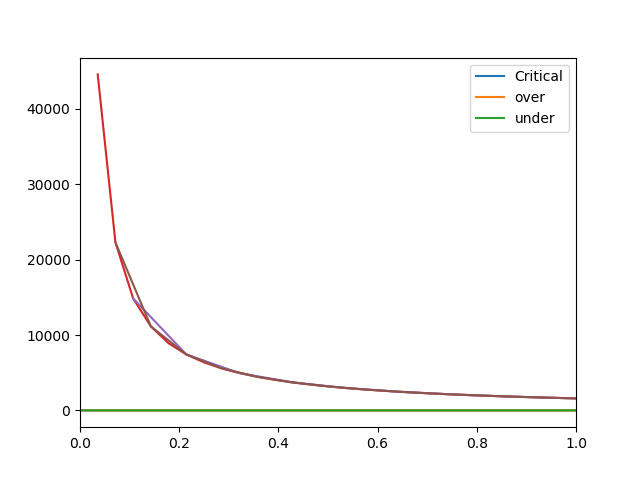

In [23]:
ax=crit.series.plot(label="Critical")
over.series.plot(ax=ax, label="over")
under.series.plot(ax=ax, label="under")
plt.legend()

In [24]:
ax=under.frequency().plot()
over.frequency().plot(ax=ax)
crit.frequency().plot(ax=ax)
plt.xlim(0,1)

(0, 1)

4640
66.58893876009788


<IPython.core.display.Javascript object>


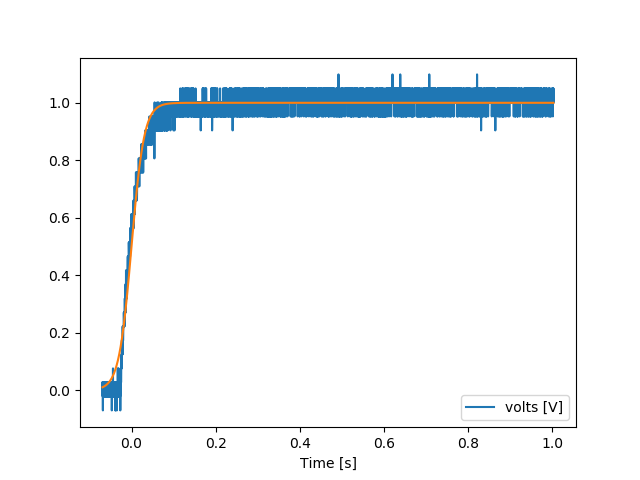

In [273]:
def curve(t, r, i):
    if t is None:
        t=np.linspace(0, 8*np.pi, 1000)
    
    return np.real(1-np.exp(-1*(r+ i*1j)*t))

def step(t, xoffset, yoffset, amplitude):
    return (yoffset+amplitude*(t>xoffset)).astype(float)

def sigmoid(t, xoffset, yoffset, rise, amplitude):
    return yoffset+amplitude*special.expit(rise*(t-xoffset))


def sigmoid_fit(self):
    sigmoid = lambda x, x0, y0, rise, amp : y0+amp*special.expit(rise*(x-x0))
    x, y = self.x, self.y
    xi = np.mean(x)
    yi = np.mean(y)
    ampi = 1.0
    risei = 1.0
    (x0, y0, rise, amp), cov = curve_fit(sigmoid, x, y, p0=[xi, yi, ampi, risei])
    nfit = sigmoid(x, x0, 0, rise, 1)
    idx = np.argmax(nfit>0.01)
    
    print(idx)
    output = ((self.series-y0)/amp)
    output.index-=x0
    
    print(rise)
    return output.iloc[idx:], (x0, y0, rise, amp), nfit[idx:]

    
norm, (x0, y0, rise, amp), nfit = sigmoid_fit(real_out)
norm.plot()
plt.plot(norm.index, nfit)

#plt.plot(real_out.x, real_out.y)
#plt.plot(real_out.x, sigmoid(t, *fit))

In [26]:
x=way_under.series.index.to_numpy()
y=way_under.series.to_numpy()

<IPython.core.display.Javascript object>


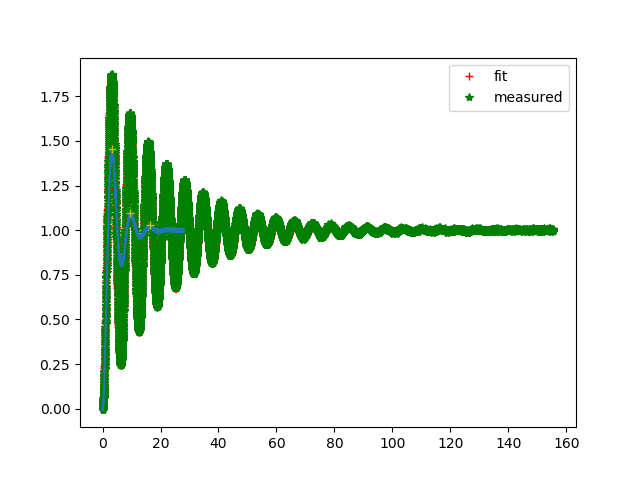

In [27]:
(r, i), cov = curve_fit(curve, x, y  )
yfit = curve(x, r, i)
fig, ax = plt.subplots()
ax.plot(x, yfit, 'r+', label="fit")
ax.plot(x, y, "g*", label="measured")
plt.legend()

In [28]:
peaks, props = signal.find_peaks(under.series.to_numpy(), width=0.01*len(under.series))
ax=under.series.plot()
under.series.iloc[peaks].plot(ax=ax, style="y+")

In [29]:
an=under.analyze()


<IPython.core.display.Javascript object>


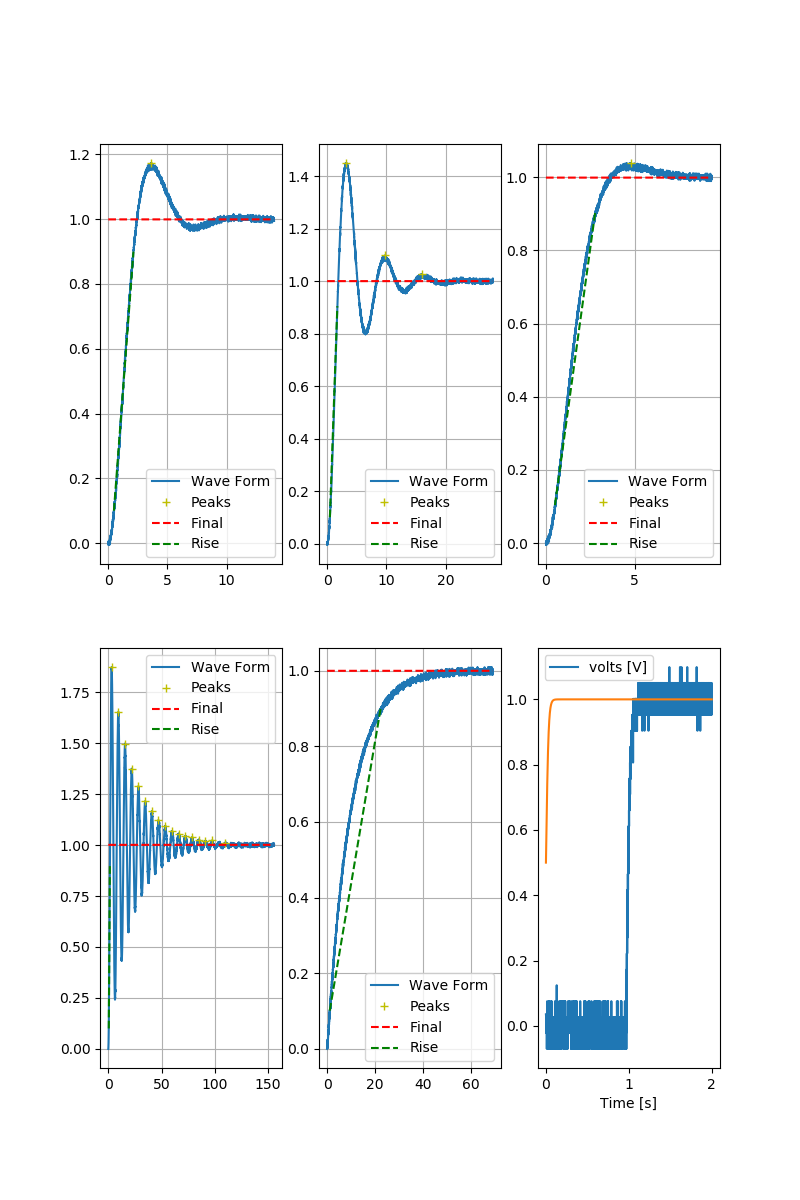

In [6]:
fig, ((ax1, ax2 ,ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8,12))

series, fitps, nfit=real_out.sigmoid_normalize()
series.plot(ax=ax6)
plt.plot(series.index, nfit)

crit.plot_analysis(ax1)
under.plot_analysis(ax2)
over.plot_analysis(ax3)
way_under.plot_analysis(ax4)
way_over.plot_analysis(ax5)
#real_out.series.plot(ax=ax6)

Error loading C:\Users\srswi\Anaconda3\envs\tektronix\lib\site-packages\tektronix-0.1.0-py3.7.egg\tektronix\waveforms\2020-03-11T13_ch1.csv: No columns to parse from file
Error loading C:\Users\srswi\Anaconda3\envs\tektronix\lib\site-packages\tektronix-0.1.0-py3.7.egg\tektronix\waveforms\f.csv: No columns to parse from file
Error loading C:\Users\srswi\Anaconda3\envs\tektronix\lib\site-packages\tektronix-0.1.0-py3.7.egg\tektronix\waveforms\mywave.csv: Index Time [s] invalid


<IPython.core.display.Javascript object>


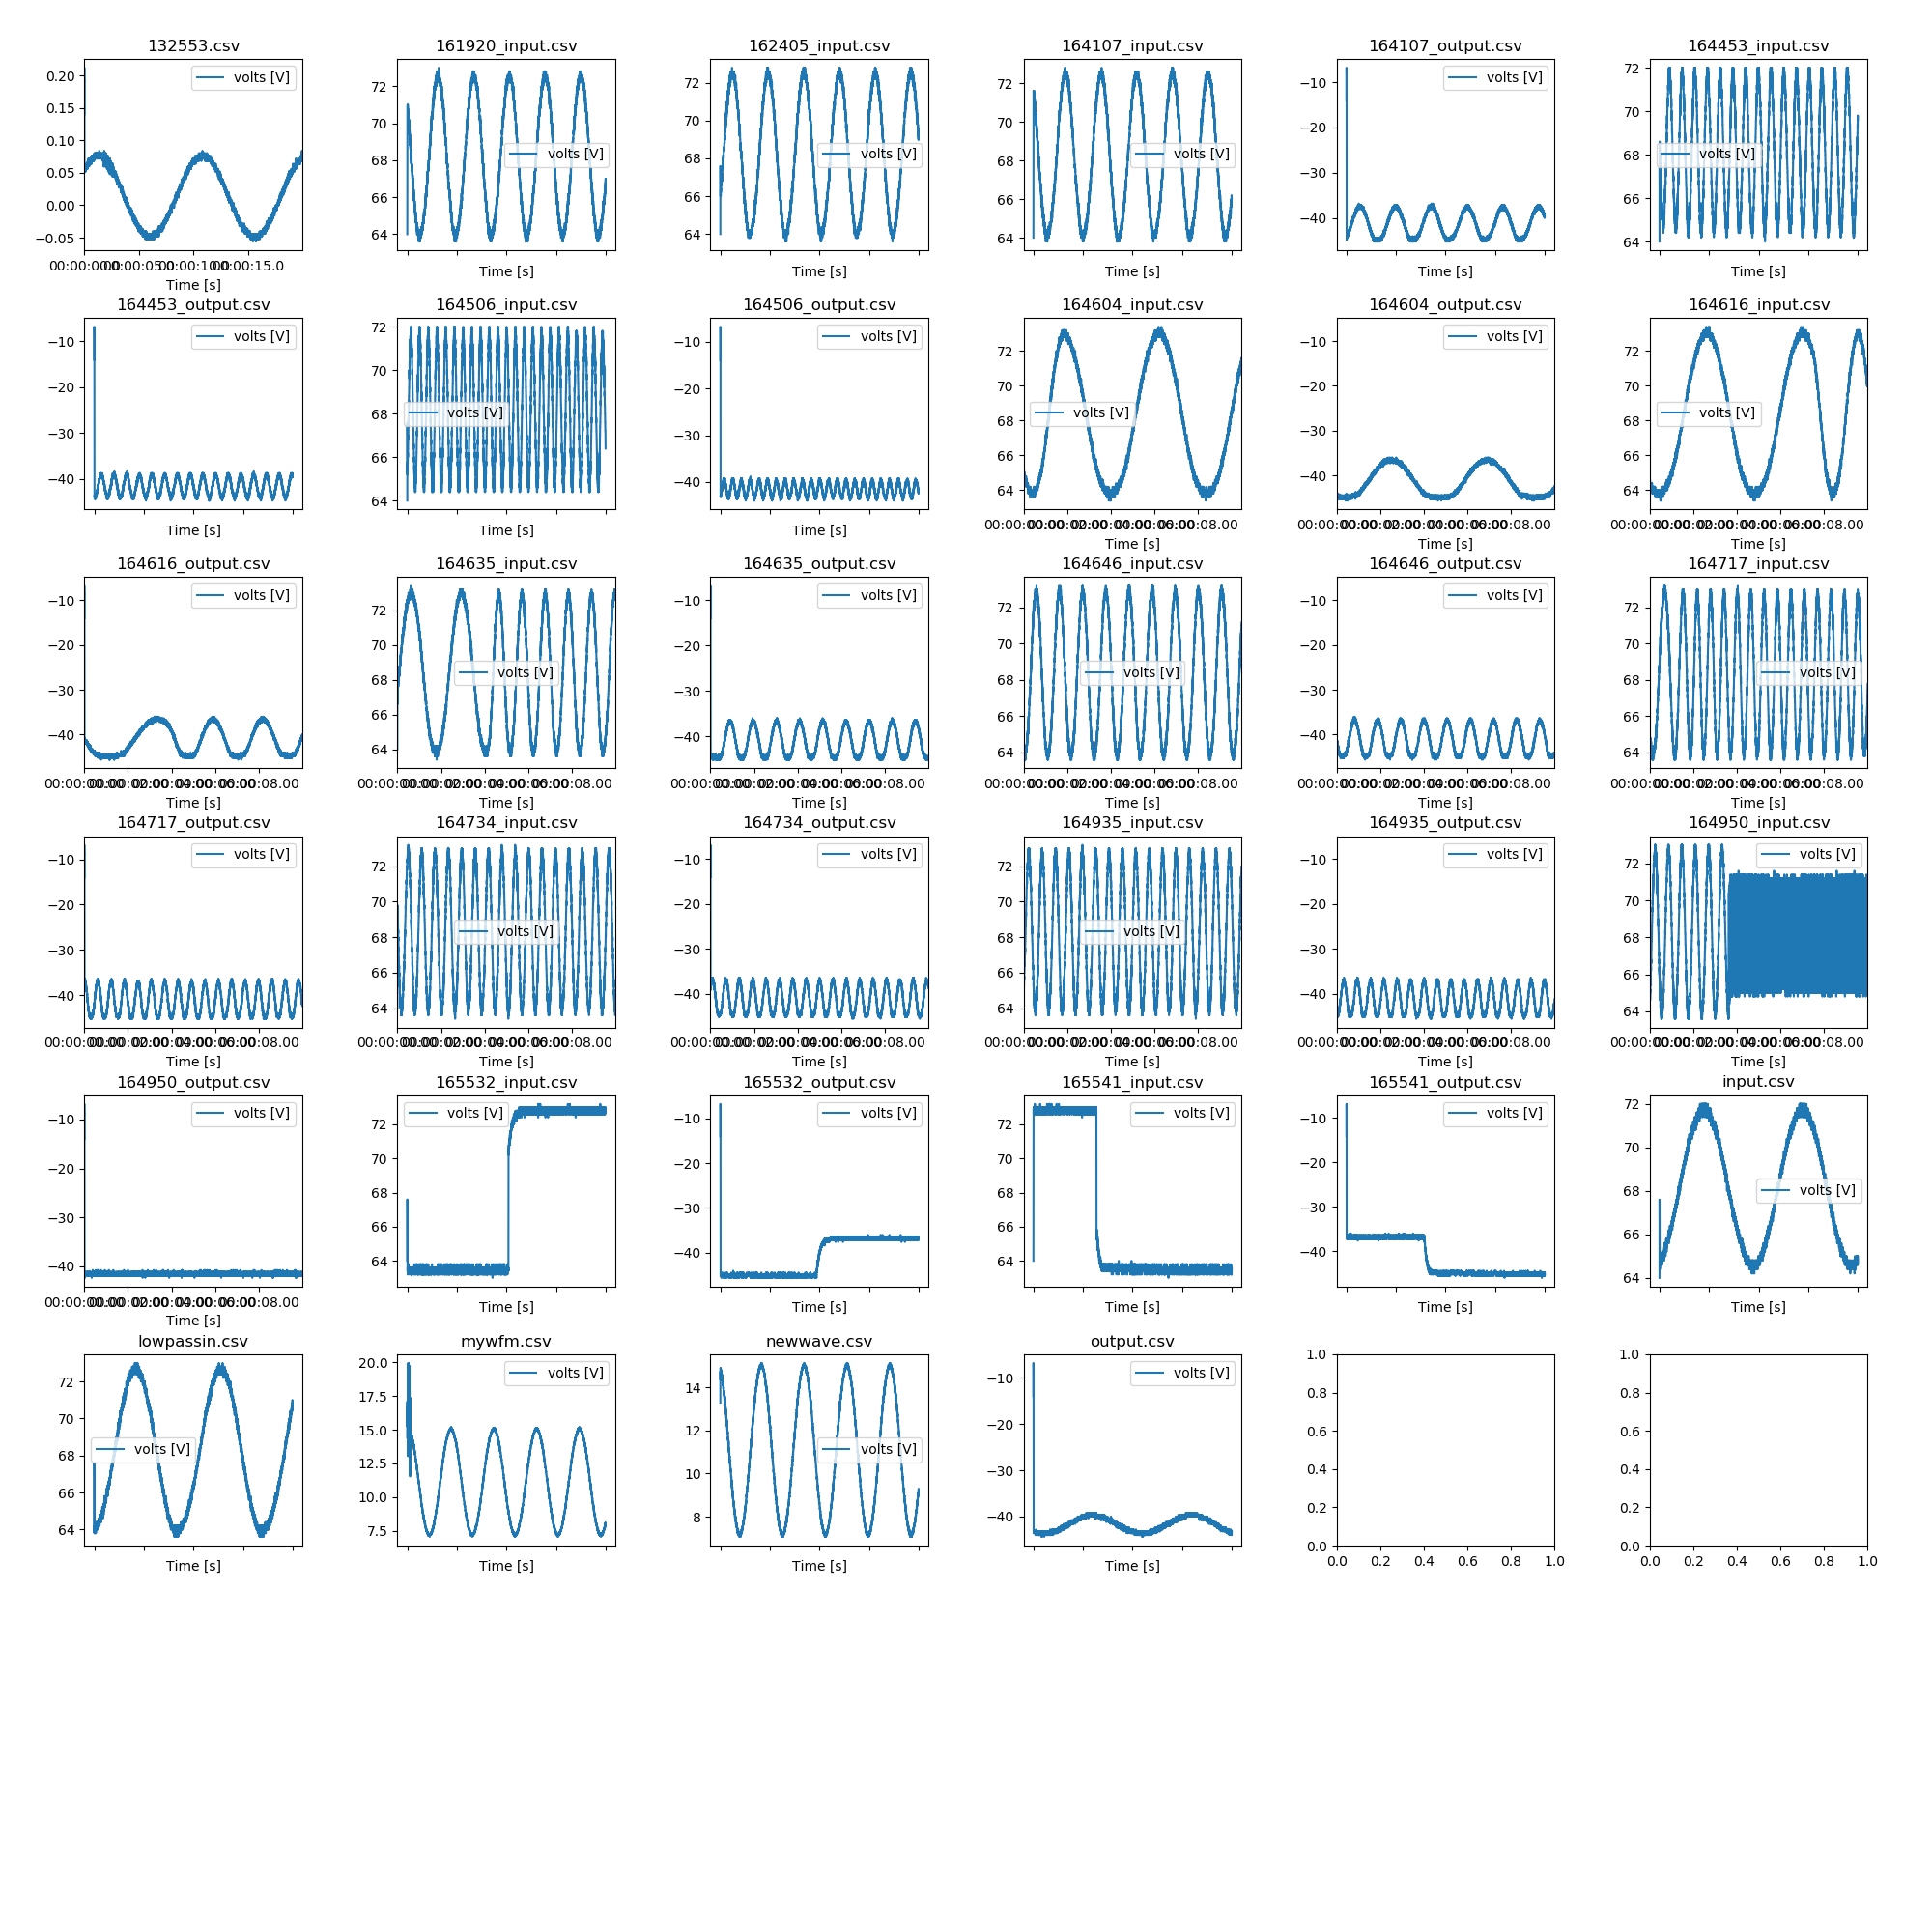

132553.csv
161920_input.csv
162405_input.csv
164107_input.csv
164107_output.csv
164453_input.csv
164453_output.csv
164506_input.csv
164506_output.csv
164604_input.csv
164604_output.csv
164616_input.csv
164616_output.csv
164635_input.csv
164635_output.csv
164646_input.csv
164646_output.csv
164717_input.csv
164717_output.csv
164734_input.csv
164734_output.csv
164935_input.csv
164935_output.csv
164950_input.csv
164950_output.csv
165532_input.csv
165532_output.csv
165541_input.csv
165541_output.csv
input.csv
lowpassin.csv
mywfm.csv
newwave.csv
output.csv


In [32]:
wfs=tektronix.load_all()
len(wfs)
fig, axes = plt.subplots(6,6, figsize=(20,20))
fig.tight_layout(pad=4.0)
axes=axes.reshape((36,))
for ii, wfdata in enumerate(wfs):
    ax = axes[ii]
    
    wf = wfdata[0]
    print(Path(wf.fnmae.name))
    wf.series.plot(ax=ax, title=Path(wf.fnmae).name)

In [3]:

real_in,_  = tektronix.load("165532_input.csv")
real_in.set_index("float")
real_out,_  = tektronix.load("165532_output.csv")
real_out.set_index("float")


real_in.clean_step(sigma=6.0, window=1000)
real_out.clean_step(sigma=6.0, window=1000)


#ax=real_in.series.plot()
#real_out.series.plot(ax=ax)

Replaced 6 points 
Replaced 7 points 


<IPython.core.display.Javascript object>


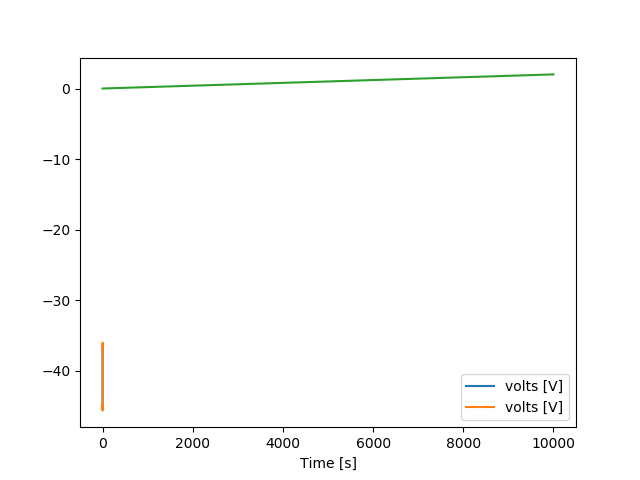

In [31]:
ax=real_out.series.rolling(1000).mean().plot()
real_out.series.plot(ax=ax)

<IPython.core.display.Javascript object>


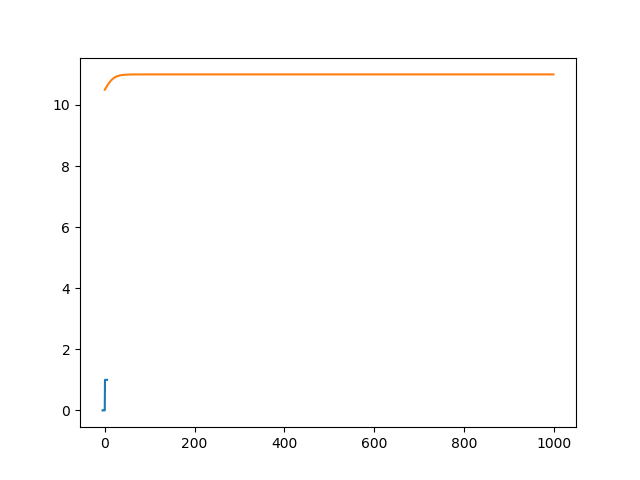

In [135]:
x=np.linspace(-5,5,1000)
plt.plot(x,special.expit(100*x))

In [108]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    np.hanning, np.hamming, np.bartlett, np.blackman, np.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y[:len(x)]

<IPython.core.display.Javascript object>


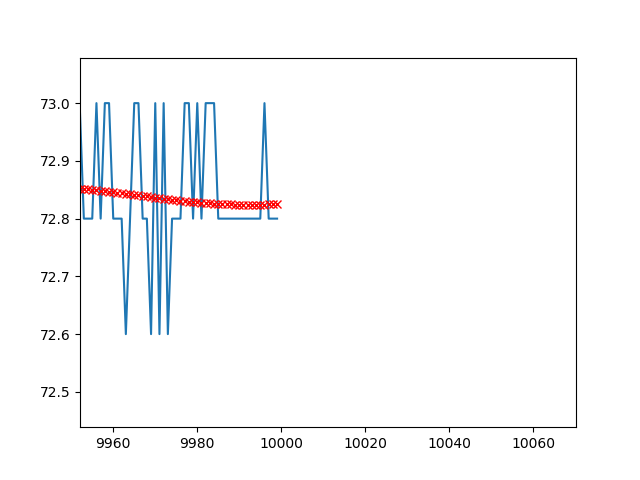

In [109]:
plt.plot(y)
plt.plot(smooth(y, 100), "rx")

In [110]:
len(smooth(y))

10000

AttributeError: module 'numpy' has no attribute 'normalize'